# SEP532 - 인공지능 이론과 실제 (2022 Spring)
## Deep Learning Practice 
#### Prof. Ho-Jin Choi
#### School of Computing, KAIST

---

## 2 - Transfer learning with pre-trained CNNs


### 2-1. Several well-known CNN models

Constructing and training your own CNN models from scratch can be hard and a long task. A common trick used in deep learning is to use a **pre-trained** model and **fine-tune** it to the specific data it will be used for. 

To use the pre-trained models for our task, we will first look into several well-known CNN models. Many CNN models have been studied since the 1990s. Especially, since 2010, more advanced models have been developed  through a [ImageNet: Large scale visual recognition challenge (ILSVRC)](http://www.image-net.org/challenges/LSVRC/) in the computer vision fields such as image recognition, object detection, etc.

- LeNet 
- AlexNet
- VGG 
- MobileNet
- Inception (GoogLeNet)
- ResNet50 
- Xception
- ... more to come

#### LeNet

<img src=https://miro.medium.com/max/4308/1*1TI1aGBZ4dybR6__DI9dzA.png width="900">

- Yann LeCun et al. proposed a neural network architecture for handwritten and machine-printed character recognition in 1990’s.
- The first successful applications of CNN.
- This model consists of 3 convolution layers, 2 pooling layers and 1 fully-connected layer.

#### AlexNet

<img src=https://miro.medium.com/max/3072/1*qyc21qM0oxWEuRaj-XJKcw.png width="700">

- The first work that popularized convolutional neural networks in computer vision.
- This was submitted to the ImageNet ILSVRC challenge in 2012. 
- This network had a very similar architecture to LeNet, but was deeper, bigger, and featured convolutional layers stacked on top of each other.

#### VGG

#### VGG models 
<img src="https://mblogthumb-phinf.pstatic.net/MjAxODA0MjNfODQg/MDAxNTI0NDQ5MTg5ODU2.6lGk6U311swxltH-UFLgnaTZ90ob2EJzDS3k8Ff95dgg.YcUEV4UK-NsNpWPw0OLicQcBy0pCxxdvVNYoP-48xCgg.JPEG.laonple/1.jpg?type=w2" width="700">

##### VGG-16
<img src=https://neurohive.io/wp-content/uploads/2018/11/vgg16-neural-network.jpg width="700">

##### VGG-19
<img src=https://www.researchgate.net/profile/Clifford_Yang/publication/325137356/figure/fig2/AS:670371271413777@1536840374533/llustration-of-the-network-architecture-of-VGG-19-model-conv-means-convolution-FC-means.jpg width="700">

- The runner-up in ILSVRC 2014 (VGG16)
- Its main contribution was in showing that the depth of the network is a critical component for good performance.

#### Inception(-v3) (GoogLeNet)

<img src=https://blog.kakaocdn.net/dn/Iq9NO/btqyPWk5PBX/K2JicGjIjj5w0eFIbhx4bK/img.png width="1000">

<img src=https://cdn-images-1.medium.com/max/1600/1*66hY3zZTf0Lw2ItybiRxyg.png width="700">

<img src=https://paperswithcode.com/media/methods/Screen_Shot_2020-06-22_at_3.22.39_PM.png width="900">

<img src="images/inception_parameters.png" width="800"/>


- The winner in ILSVRC 2014
- Its main contribution was the development of an `Inception Module` that dramatically reduced the number of parameters in the network.
- There are also several follow-up versions to the GoogLeNet, most recently Inception-v4.!4

#### ResNet(-50)

<img src=https://i.stack.imgur.com/XTo6Q.png width="500">

<img src="images/resnet_diff.png" width="800"/>

- The winner in ILSVRC 2015
- It features special skip connections and a heavy use of batch normalization.
- The architecture is also missing fully connected layers at the end of the network. 

### 2-2. Tutorial of the pre-trained models using Keras API

#### Ex) VGG16
We can use the pre-trained CNN models mentioned above using the Keras API [tf.keras.applications](https://keras.io/applications/).

(More models available in Kareas can be found here: https://github.com/keras-team/keras-applications)

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf

import os
import numpy as np
from PIL import Image

If the pre-trained VGG16 model has not been downloaded, the below cell will download the pre-trained model first, then load the pre-trained model.

In [2]:
from tensorflow.keras.applications import VGG16
vgg16 = VGG16(include_top=True, weights='imagenet')
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from google.colab import drive

drive.mount('/gdrive')

In [ ]:
gdrive_root = '/gdrive/My Drive'
print('In gdrive :', os.listdir(gdrive_root))

notebook_dir = os.path.join(gdrive_root, 'Colab Notebooks')
print('In Colab Notebooks :', os.listdir(notebook_dir))

--2022-05-01 14:17:29--  https://pds.joins.com/news/component/htmlphoto_mmdata/201502/04/htm_20150204185442c010c011.jpg
Resolving pds.joins.com (pds.joins.com)... 121.78.73.140
Connecting to pds.joins.com (pds.joins.com)|121.78.73.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67957 (66K) [image/jpeg]
Saving to: ‘./images/strawberry.png’

./images/strawberry 100%[===================>]  66.36K  --.-KB/s    in 0.008s  

2022-05-01 14:17:29 (8.43 MB/s) - ‘./images/strawberry.png’ saved [67957/67957]



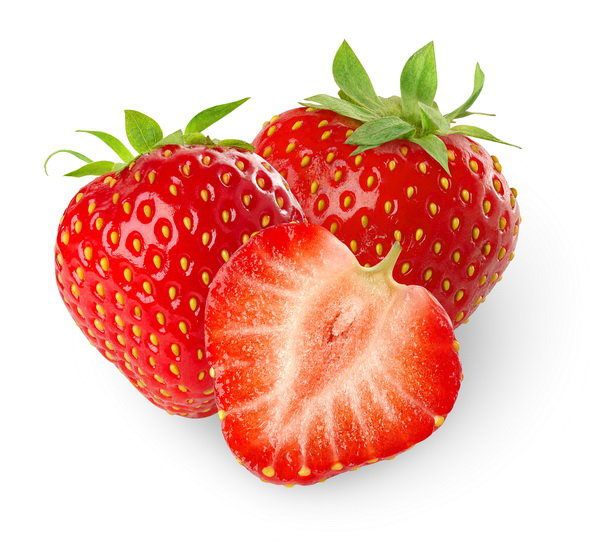

In [5]:
# For Colabl

"""
!wget https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTtmYIYGx1zXVT4UyjturF3uL7AWx4FKdfJJAnjCrPKxJnjHSxJ -O '/gdrive/My Drive/strawberry.png'
print('In gdrive :', os.listdir(gdrive_root))

image_path = os.path.join(gdrive_root, 'strawberry.png')
img = Image.open(image_path)
img

"""
!wget 'https://pds.joins.com/news/component/htmlphoto_mmdata/201502/04/htm_20150204185442c010c011.jpg' -O './images/strawberry.png'

image_path = os.path.join('./images', 'strawberry.png')
img = Image.open(image_path)
img

In [17]:
# load the image for preprocessing 
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))

# conver image to array (shape = 224, 224, 3)
x = tf.keras.preprocessing.image.img_to_array(image)

# preprocesses a tensor or Numpy array encoding a batch of images.
x = tf.keras.applications.vgg16.preprocess_input(x)

# change image dim from (224, 224, 3) to (1, 224, 224, 3)
x = np.expand_dims(x, axis=0)
print('Input image shape:', x.shape, end='\n')

# feed the image to vgg model 
predictions = vgg16(x)
print('Shape of predictions:', predictions.shape, end='\n\n')

predictions = tf.keras.applications.vgg16.decode_predictions(predictions.numpy())[0]
print('Top-{} predictions:'.format(len(predictions)))
for index, prediction in enumerate(predictions):
    print('{}. {}'.format(index + 1, prediction))

Input image shape: (1, 224, 224, 3)
Shape of predictions: (1, 1000)

Top-5 predictions:
1. ('n07745940', 'strawberry', 0.9996319)
2. ('n07747607', 'orange', 4.891943e-05)
3. ('n07768694', 'pomegranate', 4.633361e-05)
4. ('n07613480', 'trifle', 3.269289e-05)
5. ('n07753275', 'pineapple', 3.1969994e-05)


As shonw in the prediction results, the VGG16 model predicted a class of the input as a _'strawberry'_ with highest confidence value (or probability), 0.999. 

Let's try to predict again with another image. 

--2022-05-01 14:21:25--  https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F214DC34558F84CEC18
Resolving img1.daumcdn.net (img1.daumcdn.net)... 203.253.111.72, 203.253.111.74, 2001:320:61:1::cbfd:6f48, ...
Connecting to img1.daumcdn.net (img1.daumcdn.net)|203.253.111.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29865 (29K) [image/jpeg]
Saving to: ‘./images/orange.jpg’

./images/orange.jpg 100%[===================>]  29.17K  --.-KB/s    in 0s      

2022-05-01 14:21:25 (94.7 MB/s) - ‘./images/orange.jpg’ saved [29865/29865]



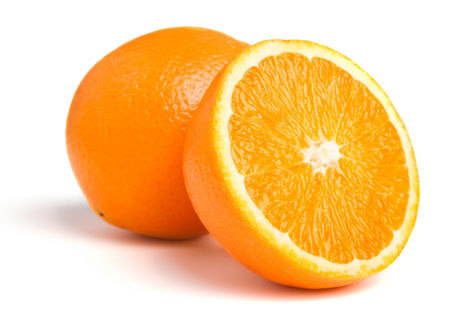

In [18]:
### For Colab, 
"""
!wget https://ww.namu.la/s/a9c9d9c03c04786189170e15a45360e0e310fdf789723fe314ea6910f56d609bbca103e6b735ff8c7dec82fc9db7363b64bb507fca3b2a4fb530e28e771f98834ce60900851ec55503934dd4bdf7d183870d10247f4597014fb8c27082bafa29 -O '/gdrive/My Drive/orange.png'

image_path = os.path.join(gdrive_root, 'orange.png')
img = Image.open(image_path)
img
""" 

!wget 'https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F214DC34558F84CEC18' -O './images/orange.jpg'
    
image_path = os.path.join('./images', 'orange.jpg')
img = Image.open(image_path)
img


In [19]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
x = tf.keras.preprocessing.image.img_to_array(image)
x = np.expand_dims(x, axis=0)
x = tf.keras.applications.vgg16.preprocess_input(x)
print('Input image shape:', x.shape, end='\n\n')

predictions = vgg16(x)
predictions = tf.keras.applications.vgg16.decode_predictions(predictions.numpy())[0]
print('Top-{} predictions:'.format(len(predictions)))
for index, prediction in enumerate(predictions):
    print('{}. {}'.format(index + 1, prediction))

Input image shape: (1, 224, 224, 3)

Top-5 predictions:
1. ('n07747607', 'orange', 0.9824516)
2. ('n07749582', 'lemon', 0.009053841)
3. ('n07717556', 'butternut_squash', 0.0041012517)
4. ('n03937543', 'pill_bottle', 0.00060899067)
5. ('n04409515', 'tennis_ball', 0.0005611767)


#### Ex) ResNet50

Similar to VGG16 model, we will just use the Keras API to load the pre-trained ResNet50.

A ResNet is composed by two main blocks: **Identity Block** and the **ConvBlock**.
- IdentityBlock is the block that has no convolutional layer at shortcut
- ConvBlock is the block that has a convolutional layer at shortcut

ResNet50 is so big. Let's check it!

In [23]:
resnet50 = tf.keras.applications.ResNet50(include_top=True, weights='imagenet')
resnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [24]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
x = tf.keras.preprocessing.image.img_to_array(image)
x = np.expand_dims(x, axis=0)
x = tf.keras.applications.vgg16.preprocess_input(x)
print('Input image shape:', x.shape, end='\n\n')

predictions = resnet50(x)
predictions = tf.keras.applications.resnet50.decode_predictions(predictions.numpy())[0]
print('Top-{} predictions:'.format(len(predictions)))
for index, prediction in enumerate(predictions):
    print('{}. {}'.format(index + 1, prediction))

Input image shape: (1, 224, 224, 3)

Top-5 predictions:
1. ('n07747607', 'orange', 0.95613974)
2. ('n07749582', 'lemon', 0.043828383)
3. ('n07753592', 'banana', 1.4260228e-05)
4. ('n07753275', 'pineapple', 4.605074e-06)
5. ('n07745940', 'strawberry', 1.660499e-06)


### References 
- [Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556) - please cite this paper if you use the VGG models in your work.
- [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385) - please cite this paper if you use the ResNet model in your work.
- [Rethinking the Inception Architecture for Computer Vision](http://arxiv.org/abs/1512.00567) - please cite this paper if you use the Inception v3 model in your work.